Face contains 64 landmarks 

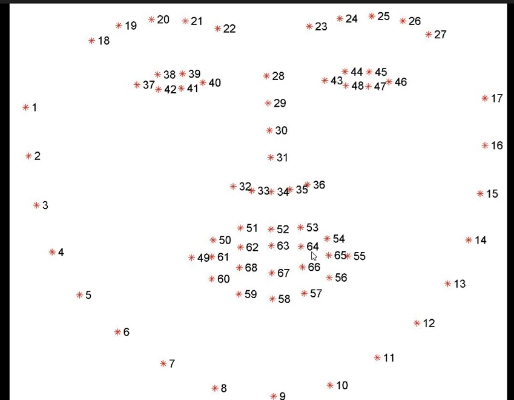

In [1]:
import dlib as dl
import numpy as np
import cv2 as cv
import time as t
import pygame as pg

pygame 2.6.0 (SDL 2.28.4, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Detect face

In [16]:
cap = cv.VideoCapture(0)
detector = dl.get_frontal_face_detector()

while True:
    ret,frame = cap.read(0)
    grayFrame = cv.cvtColor(frame,cv.COLOR_RGB2GRAY)
    faces = detector(grayFrame)
    for face in faces:
        
        print(face) # face contains (x1,top point(y1) , x2,bottom point(y2) ) we will paintb them
        cv.circle(frame,(face.left(),face.top()),7,(0,0,255),-1)
        cv.circle(frame,(face.right(),face.bottom()),7,(255,0,0),-1)
        cv.rectangle(frame,(face.left(),face.top()),(face.right(),face.bottom()),(0,255,0),)
    cv.imshow("frame",frame)
    if cv.waitKey(1)==27:
        break
cv.destroyAllWindows()
cap.release()

[(277, 344) (427, 493)]
[(277, 344) (427, 493)]
[(261, 327) (410, 476)]
[(234, 313) (413, 492)]
[(244, 311) (394, 460)]
[(234, 293) (413, 473)]
[(261, 311) (410, 460)]
[(261, 311) (410, 460)]
[(261, 311) (410, 460)]
[(261, 311) (410, 460)]
[(273, 154) (453, 333)]
[(273, 154) (453, 333)]
[(273, 154) (453, 333)]
[(273, 174) (453, 353)]
[(273, 194) (453, 373)]
[(277, 228) (427, 377)]
[(277, 244) (427, 394)]
[(277, 244) (427, 394)]
[(254, 254) (433, 433)]
[(254, 254) (433, 433)]
[(254, 254) (433, 433)]
[(261, 277) (410, 427)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]
[(261, 294) (410, 443)]


# Detect Face and its landmark & sleep detetcion

In [5]:
cap = cv.VideoCapture(0)
detector = dl.get_frontal_face_detector()
predictor = dl.shape_predictor("shape_predictor_68_face_landmarks.dat")
counter = 0
EYE_CONSEC_FRAMES = 10
alarmOn=False
pg.mixer.init()

# Load and play the sound file
pg.mixer.music.load('alarm.mp3')

while True:
    ret,frame = cap.read(0)
    frame = cv.resize(frame,(800,600))
    grayFrame = cv.cvtColor(frame,cv.COLOR_RGB2GRAY)
    faces = detector(grayFrame)
    for face in faces:
        
        

        cv.rectangle(frame,(face.left(),face.top()),(face.right(),face.bottom()),(0,255,0),)
        
        landmarks = predictor(grayFrame,face) # function to access landmarks of detected face
        
        for landmarkIndex in range(0,68):#draw all landmarks
            
            cv.circle(frame,(landmarks.part(landmarkIndex).x,landmarks.part(landmarkIndex).y),1,(255,0,0),-1)
           
                
            
            
        if np.absolute(np.absolute(landmarks.part(43).y)-np.absolute(landmarks.part(47).y))<=6 :
            counter=counter+1
            
            if counter>=EYE_CONSEC_FRAMES:
                
                alarmOn = True
                cv.putText(frame,"sleep detection",(250,150),cv.FONT_HERSHEY_COMPLEX,2,(0,0,255),3)
                pg.mixer.music.play()
                
            
        else:
            counter=0
            pg.mixer.music.stop()
            
            
    cv.imshow("frame",frame)
    if cv.waitKey(1)==27:
        break
cap.release()
cv.destroyAllWindows()


In [2]:
ps.playsound("alarm.mp3")


    Error 263 for command:
        close alarm.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm.mp3


In [3]:
pip install pygame
